# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

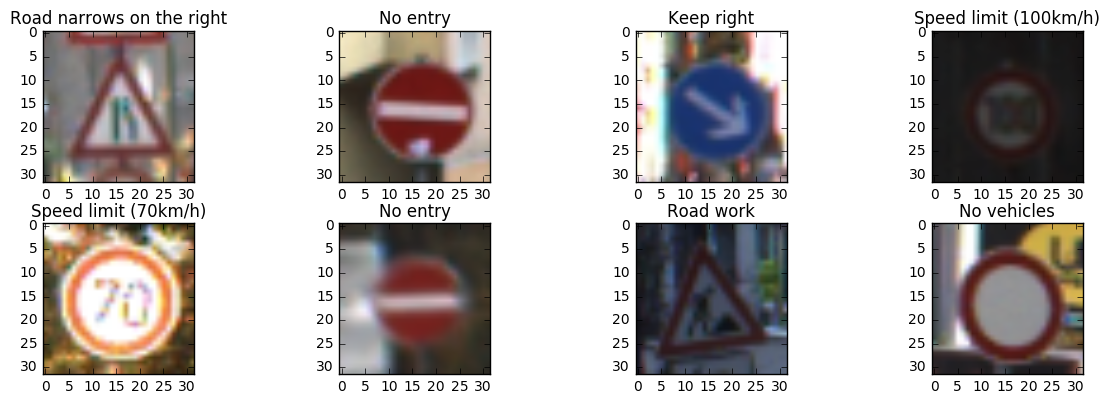

In [4]:
import numpy as np
# Let's also get sign name
signs = []
with open('signnames.csv') as csvfile:
    line = csvfile.readline()  # jump over headers
    for line in csvfile.readlines():
        signs.append(line.strip().split(',')[1])
fig, ax = plt.subplots(2,4)
# keep some ramdomly selected images to do test on them
samples = np.random.randint(0, n_train, 8)
fig.set_size_inches(12,4)
fig.tight_layout()
for axis, n in zip(ax.flatten(), samples):
    axis.imshow(X_train[n])
    axis.set_title(signs[y_train[n]])

Histrogram showing the number of samples in each class. There are certain clases with a much higher count of samples

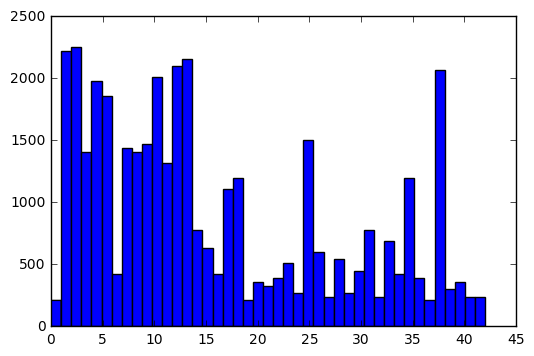

In [5]:
f = plt.hist(y_train, n_classes)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

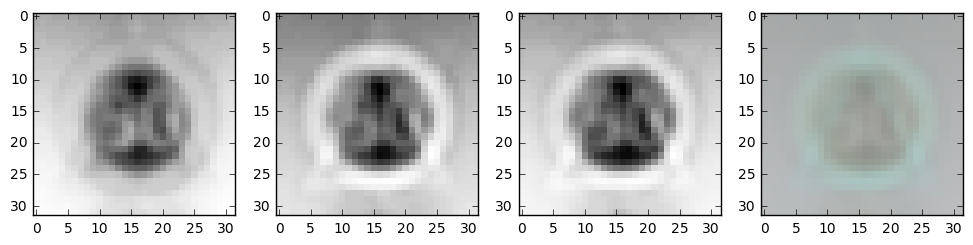

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# Let's check how the mean image looks like on each channel
mean_image = np.mean(X_train, axis=0).astype(int)
fig, ax = plt.subplots(1,4)
fig.set_size_inches(12,4)
for i in range(3):
    ax[i].imshow(mean_image[:,:,i], cmap='Greys', interpolation='none')
ax[3].imshow(mean_image, interpolation='none', vmin=0, vmax=255)

In [8]:
# zero center images and normalize them with values from the training set
# create index of random idetifiers to divide the training set
# fraction reserved for validation
val_frac = 0.3

from sklearn.model_selection import train_test_split
training_x, validation_x, training_y, validation_y = train_test_split(X_train, y_train, test_size=val_frac)
# Normalize all data (training + validation) but with statistics from training set
mean = np.mean(training_x, axis=0)
std = np.std(training_x, axis=0)
training_x = (training_x - mean) / std
validation_x = (validation_x - mean) / std

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I've have done the standard procedure of centering the data around its mean and scaling it by its standard deviation. This is useful to make life easier for the optimizer. In this case, I believe it will not make a huge difference. I believe so because this is useful for features that are different in range. Since we are talking about pixels, values for the features are going to be always in the range 0-255 for each channel. Also, the distance (in color space) between two features is homogeneous in each feature. As an example, a jump from 0 to 120 represents the same change in intensity independently of the pixel position. Anyhow, it is good practice to do this on the data.

I applied this normalization based on statistics from the training data only. This seems more correct as no information on the validation or test sets is passed to the learning algorithm

Other alternatives would be to do this on the greyscale image, normalizing just one channel, etc.

An alternative that I think would be useful is doing some image treatment to the set. For example, applying some filtering, edge finding, etc. I would interpret this as a form of feature engineering. For example filter images for edge finding and apply those edges as a mask to reinforce them in the image. Although this looks like it could help the network, it would also bias it towards those time of image features. I have decided against it because that kind of filtering can be done naturally during convolution. Thus, the parameters (filter intensity, size, and so on) that have to be done by hand during per-proccess of the data, can instead be learn by the network

In [ ]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
# data already splitted for normalization step

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
To start off I have used a commonly seen split of 30% of my training data used for validation and 70% for training. Even though the data was not split before, an index of which data points to use for this set was created. Thus, we could normalize our data just with our training set.

Time permitting, I would have created some synthetic samples. Having more data, even if synthetic (assuming it is created appropriately) can improve notably the predictive capacity of the network. In particular, increasing the amount of data helps a lot avoiding overfitting.

In our case, there are several good candidates for this. Most affine transformation would make sense. To put one example, a difference in the orientation of the camera would be seen in images that are inclined. We can train our networks to expect those by slightly rotate our training set. Same with moving them a little up or down. Convolution networks  should be invariant to affine transformations so these would help learning.

Other good candidates are image treatment techniques. For example, darkening or lightening images to incorporate more variation.

Those techniques can be applied to the complete set. A more manual technique could also be used that involves cropping the sign and incorporating different backgrounds. On a first try, for example a randomly generated green image could be use. Something similar is going to be commonly found on the road. Same for a sign over a blue background.

Something interesting to do with this technique would be to take, for example, the four or five signs that the networks best classifies in a first training pass. Then we would use those for our synthetic extra images with different backgrounds. Even if it is not like using adversarial networks, I think that in some sense it would be like trying to confuse our network, forcing it to improve on the results.

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
epochs = 20
batch_size = 512
mu = 0
sigma = 0.1

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
    
# SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.zeros(6))
conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

# SOLUTION: Activation.
conv1 = tf.nn.relu(conv1)

# SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.zeros(16))
conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

# SOLUTION: Activation.
conv2 = tf.nn.relu(conv2)

# SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# SOLUTION: Flatten. Input = 5x5x16. Output = 400.
fc0   = tf.contrib.layers.flatten(conv2)

# SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.zeros(120))
fc1   = tf.matmul(fc0, fc1_W) + fc1_b

# SOLUTION: Activation.
fc1    = tf.nn.relu(fc1)

# SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
fc2_b  = tf.Variable(tf.zeros(84))
fc2    = tf.matmul(fc1, fc2_W) + fc2_b

# SOLUTION: Activation.
fc2    = tf.nn.relu(fc2)

# SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
fc3_b  = tf.Variable(tf.zeros(n_classes))
logits = tf.matmul(fc2, fc3_W) + fc3_b

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.
rate = 0.001

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
# Run this just to check that we can evaluate the performance
# At this point it should be very bad (random) if not something is wrong
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(evaluate(training_x, training_y))

0.0333746265359


In [20]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(training_x)
    
    print("Training...")
    print()
    for i in range(epochs):
        X_train, y_train = shuffle(training_x, training_y)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(validation_x, validation_y)
        # extra not needed. It makes things slower but intesting to see if they differ:
        #training_accuracy = evaluate(training_x, training_y)
        print("EPOCH {} ...".format(i+1))
        #print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './myLeNet')
    print("Model saved")


Training...

EPOCH 1 ...
Validation Accuracy = 0.470

EPOCH 2 ...
Validation Accuracy = 0.709

EPOCH 3 ...
Validation Accuracy = 0.827

EPOCH 4 ...
Validation Accuracy = 0.879

EPOCH 5 ...
Validation Accuracy = 0.911

EPOCH 6 ...
Validation Accuracy = 0.923

EPOCH 7 ...
Validation Accuracy = 0.931

EPOCH 8 ...
Validation Accuracy = 0.943

EPOCH 9 ...
Validation Accuracy = 0.953

EPOCH 10 ...
Validation Accuracy = 0.957

EPOCH 11 ...
Validation Accuracy = 0.961

EPOCH 12 ...
Validation Accuracy = 0.964

EPOCH 13 ...
Validation Accuracy = 0.968

EPOCH 14 ...
Validation Accuracy = 0.968

EPOCH 15 ...
Validation Accuracy = 0.973

EPOCH 16 ...
Validation Accuracy = 0.970

EPOCH 17 ...
Validation Accuracy = 0.971

EPOCH 18 ...
Validation Accuracy = 0.975

EPOCH 19 ...
Validation Accuracy = 0.975

EPOCH 20 ...
Validation Accuracy = 0.976

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.